In [1]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import glob

# District Boundaries

https://stackoverflow.com/questions/16475384/rename-a-dictionary-key

https://stackoverflow.com/questions/37279474/python-split-dictionary-key-at-comma/37279820

In [2]:
d = {}  # dictionary that will hold them 

files = glob.glob('./map_features/*.geojson')

for file in files:
    file_name = file.split('.')[1].split('/')[2]
    d[file_name] = gpd.read_file(file)
    print(file_name)
#     print(type(d[file_name]))

C_districts
Racial_and_Social_Equity_Composite_Index
Council_Districts
Zoned_Development_Capacity_Layers_2016
forPandas_censusBlocks
censusBlocks_validated_intersectedwithTracts
seattle
D_districts
Landfill_Areas
WASeattle1936
Mandatory_Housing_Affordability__MHA__Fee_Areas
Census_Block_-_2010_Population_Statistics
forPandas_selectionAnalyzeHOLC3


In [6]:
d['Racial_and_Social_Equity_Composite_Index']['HEALTH_PERCENTILE'].mean()

0.5008358208955224

## Suitability Analysis: Profile

### Census Tracts & Suitability

In [180]:
# CensusBlocks = d['Census_Block_-_2010_Population_Statistics']
# CensusBlocks = CensusBlocks[['Total_Population','GEOID10']]
# CensusBlocks.head()

In [4]:
df_rankCensus = d['forPandas_censusBlocks']
display(df_rankCensus.columns)
display(df_rankCensus.shape)
display(df_rankCensus.dtypes)



# Convert fields from obj to int

columns = ['joined_Total_Population',
       'joined_Female_under_5_years', 'joined_Male_under_5_years',
       'joined_Female_Person_of_Color_5_17_years',
       'joined_Male_Person_of_Color_5_17_years',
       'joined_Female_White_5_17_years', 'joined_Male_White_5_17_years',
       'joined_Female_Age_65_and_over', 'joined_Male_Age_65_and_over']

df_rankCensus[columns] = df_rankCensus[columns].astype(int)

df_rankCensus.head()

Index(['OBJECTID', 'PERIMETER', 'S_HOOD', 'L_HOOD', 'L_HOODID', 'SYMBOL',
       'HOODS_', 'HOODS_ID', '_mean', 'Rank', 'GEOID10', 'GEO_TYPE',
       'TRACT_10', 'BLOCK_10', 'NAMELSAD10', 'joined_Total_Population',
       'joined_Female_under_5_years', 'joined_Male_under_5_years',
       'joined_Female_Person_of_Color_5_17_years',
       'joined_Male_Person_of_Color_5_17_years',
       'joined_Female_White_5_17_years', 'joined_Male_White_5_17_years',
       'joined_Female_Age_65_and_over', 'joined_Male_Age_65_and_over',
       'geometry'],
      dtype='object')

(2875, 25)

OBJECTID                                       int64
PERIMETER                                    float64
S_HOOD                                        object
L_HOOD                                        object
L_HOODID                                       int64
SYMBOL                                         int64
HOODS_                                         int64
HOODS_ID                                       int64
_mean                                        float64
Rank                                         float64
GEOID10                                       object
GEO_TYPE                                      object
TRACT_10                                      object
BLOCK_10                                      object
NAMELSAD10                                    object
joined_Total_Population                       object
joined_Female_under_5_years                   object
joined_Male_under_5_years                     object
joined_Female_Person_of_Color_5_17_years      

,OBJECTID,PERIMETER,S_HOOD,L_HOOD,L_HOODID,SYMBOL,HOODS_,HOODS_ID,_mean,Rank,...,joined_Total_Population,joined_Female_under_5_years,joined_Male_under_5_years,joined_Female_Person_of_Color_5_17_years,joined_Male_Person_of_Color_5_17_years,joined_Female_White_5_17_years,joined_Male_White_5_17_years,joined_Female_Age_65_and_over,joined_Male_Age_65_and_over,geometry
0,58,25426.23,Atlantic,CENTRAL AREA,14,8,60,165,554.100287,1.0,...,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((551325.229 5271979.404, 551324..."
1,58,25426.23,Atlantic,CENTRAL AREA,14,8,60,165,554.100287,1.0,...,53,2,2,1,1,0,5,2,3,"MULTIPOLYGON (((552157.448 5271464.788, 552250..."
2,58,25426.23,Atlantic,CENTRAL AREA,14,8,60,165,554.100287,1.0,...,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((552435.706 5270787.069, 552440..."
3,58,25426.23,Atlantic,CENTRAL AREA,14,8,60,165,554.100287,1.0,...,42,0,1,1,1,0,1,4,2,"MULTIPOLYGON (((552522.403 5270164.191, 552519..."
4,58,25426.23,Atlantic,CENTRAL AREA,14,8,60,165,554.100287,1.0,...,80,0,0,4,8,0,0,4,3,"MULTIPOLYGON (((552698.090 5270782.987, 552697..."


In [295]:
df_rankCensus1 = df_rankCensus.groupby(['L_HOOD']).sum().reset_index()
df_rankCensus1

,L_HOOD,OBJECTID,PERIMETER,L_HOODID,SYMBOL,HOODS_,HOODS_ID,_mean,Rank,joined_Total_Population,joined_Female_under_5_years,joined_Male_under_5_years,joined_Female_Person_of_Color_5_17_years,joined_Male_Person_of_Color_5_17_years,joined_Female_White_5_17_years,joined_Male_White_5_17_years,joined_Female_Age_65_and_over,joined_Male_Age_65_and_over
0,BEACON HILL,37436,1.670186e+07,7990,2350,38376,80621,219561.567461,1268.0,20713,622,669,1234,1350,123,136,1397,1010
1,CENTRAL AREA,12006,5.263230e+06,2898,1656,12420,34155,114698.759509,207.0,8759,239,266,501,490,69,86,796,565
2,DELRIDGE,19791,4.984907e+06,4280,2140,20219,39772,100227.386592,1514.0,17236,782,825,1152,1185,286,264,774,526
3,DOWNTOWN,35091,8.587963e+06,7254,6138,36207,89886,262351.046465,1698.0,29737,223,299,410,400,74,78,2413,1838
4,NO BROADER TERM,33631,1.910868e+07,6009,4146,34497,65381,191879.062734,0.0,13232,298,319,307,314,211,217,1677,905
5,NORTHGATE,63273,1.427225e+07,1110,5550,64383,59309,247187.817475,1776.0,41743,1215,1205,1119,1042,885,891,3134,1863
6,RAINIER VALLEY,37025,1.229924e+07,6570,1752,37901,83939,190725.209187,558.0,32102,1071,1136,2313,2486,268,252,2074,1702


In [296]:
# Downtown / Central / Industrial District: 51728
(df_rankCensus1.iloc[[1,3,4]][columns].sum() / 51728) * 100

joined_Total_Population                     100.000000
joined_Female_under_5_years                   1.469224
joined_Male_under_5_years                     1.708939
joined_Female_Person_of_Color_5_17_years      2.354624
joined_Male_Person_of_Color_5_17_years        2.327560
joined_Female_White_5_17_years                0.684349
joined_Male_White_5_17_years                  0.736545
joined_Female_Age_65_and_over                 9.445561
joined_Male_Age_65_and_over                   6.394989
dtype: float64

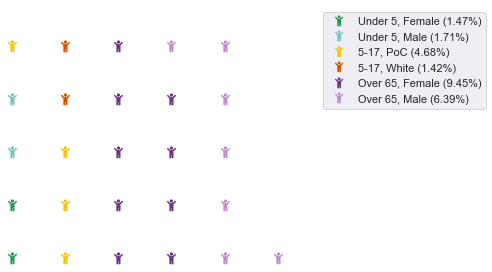

In [278]:
# Downtown / Central / Industrial District

data = {'Under 5, Female': 1.47, 'Under 5, Male': 1.71, '5-17, PoC': 4.68, '5-17, White':1.42,'Over 65, Female':9.45,'Over 65, Male':6.39}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=["#229954", "#73C6B6", "#F1C40F","#D35400","#6C3483","#BB8FCE"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    icons='child', 
    font_size=12, 
    icon_legend=True
)
plt.show()

In [272]:
# RAINIER VALLEY
(df_rankCensus.iloc[[0,6]][columns].sum() / 52815) * 100

joined_Total_Population                     100.000000
joined_Female_under_5_years                   3.205529
joined_Male_under_5_years                     3.417590
joined_Female_Person_of_Color_5_17_years      6.715895
joined_Male_Person_of_Color_5_17_years        7.263088
joined_Female_White_5_17_years                0.740320
joined_Male_White_5_17_years                  0.734640
joined_Female_Age_65_and_over                 6.571997
joined_Male_Age_65_and_over                   5.134905
dtype: float64

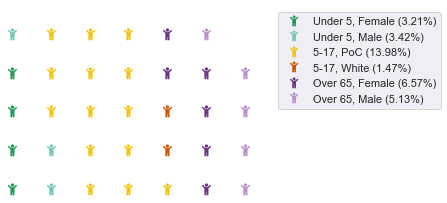

In [273]:
# RAINIER VALLEY: 52815

data = {'Under 5, Female': 3.21, 'Under 5, Male': 3.42, '5-17, PoC': 13.98, '5-17, White':1.47,'Over 65, Female':6.57,'Over 65, Male':5.13}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=["#229954", "#73C6B6", "#F1C40F","#D35400","#6C3483","#BB8FCE"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    icons='child', 
    font_size=12, 
    icon_legend=True
)
plt.show()

In [225]:
NORTHGATE_df = df_rankCensus[5:6]
(NORTHGATE_df[columns] / 41743) * 100

,joined_Total_Population,joined_Female_under_5_years,joined_Male_under_5_years,joined_Female_Person_of_Color_5_17_years,joined_Male_Person_of_Color_5_17_years,joined_Female_White_5_17_years,joined_Male_White_5_17_years,joined_Female_Age_65_and_over,joined_Male_Age_65_and_over
5,100.0,2.910668,2.886712,2.680689,2.496227,2.120116,2.13449,7.507846,4.463024


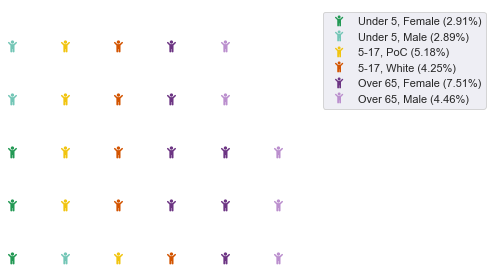

In [226]:
# NORTHGATE: 41743

data = {'Under 5, Female': 2.91, 'Under 5, Male': 2.89, '5-17, PoC': 5.18, '5-17, White':4.25,'Over 65, Female':7.51,'Over 65, Male':4.46}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=["#229954", "#73C6B6", "#F1C40F","#D35400","#6C3483","#BB8FCE"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    icons='child', 
    font_size=12, 
    icon_legend=True
)
plt.show()

In [214]:
DELRIDGE_df = df_rankCensus[2:3]
(DELRIDGE_df[columns] / 17236) * 100

,joined_Total_Population,joined_Female_under_5_years,joined_Male_under_5_years,joined_Female_Person_of_Color_5_17_years,joined_Male_Person_of_Color_5_17_years,joined_Female_White_5_17_years,joined_Male_White_5_17_years,joined_Female_Age_65_and_over,joined_Male_Age_65_and_over
2,100.0,4.537016,4.786493,6.683685,6.875145,1.659318,1.531678,4.490601,3.051752


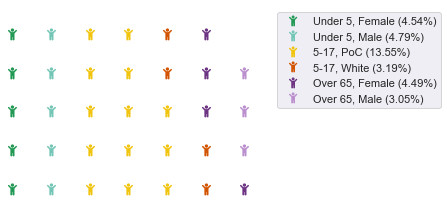

In [220]:
# DELRIDGE: 17236

data = {'Under 5, Female': 4.54, 'Under 5, Male': 4.79, '5-17, PoC': 13.55, '5-17, White':3.19,'Over 65, Female':4.49,'Over 65, Male':3.05}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=["#229954", "#73C6B6", "#F1C40F","#D35400","#6C3483","#BB8FCE"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    icons='child', 
    font_size=12, 
    icon_legend=True
)
plt.show()

### HOLC

In [3]:
df_holc = d['forPandas_selectionAnalyzeHOLC3']
df_holc = df_holc[df_holc.L_HOOD != 'NORTHGATE']  # Intersection not significant to include
df_holc.head() # area_test is the area (m^2) of the selected neighborhoods prior to intersect with HOLC's borders

,S_HOOD,L_HOOD,HOODS_ID,_mean,Rank,area_test,group,holc_id,holc_grade,area_description_data,area_intersect,geometry
0,Atlantic,CENTRAL AREA,165,554.100287,1.0,1918503,Downtown-Central-Indus,C1,C,{'1': 'Vast majority of homes in area are old ...,153909,"MULTIPOLYGON (((552774.043 5270632.307, 552773..."
1,Atlantic,CENTRAL AREA,165,554.100287,1.0,1918503,Downtown-Central-Indus,D10,D,{'1': 'This is a slide area.'},1647322,"MULTIPOLYGON (((551638.657 5272259.946, 551692..."
2,International District,DOWNTOWN,164,537.610078,2.0,572754,Downtown-Central-Indus,D10,D,{'1': 'This is a slide area.'},95542,"MULTIPOLYGON (((551101.878 5271603.533, 551060..."
3,Central Business District,DOWNTOWN,159,456.576536,8.0,879865,Downtown-Central-Indus,D10,D,{'1': 'This is a slide area.'},91,"MULTIPOLYGON (((550270.086 5273328.999, 550269..."
4,First Hill,DOWNTOWN,160,451.864728,NaN,883596,Downtown-Central-Indus,D10,D,{'1': 'This is a slide area.'},650146,"MULTIPOLYGON (((551347.564 5273229.625, 551348..."


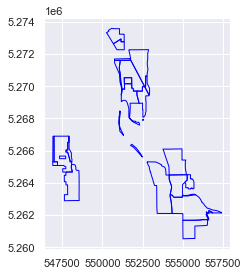

In [161]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df_holc.plot(ax=ax, facecolor='none', edgecolor='blue');

plt.tight_layout();

In [5]:
holc_neigh = df_holc.groupby(['S_HOOD','area_test','holc_grade','group'])['area_intersect'].sum().reset_index()

holc_neigh['holc_perc'] = (holc_neigh['area_intersect'] / holc_neigh['area_test']) * 100

holc_neigh

,S_HOOD,area_test,holc_grade,group,area_intersect,holc_perc
0,Atlantic,1918503,C,Downtown-Central-Indus,153909,8.022349
1,Atlantic,1918503,D,Downtown-Central-Indus,1647322,85.864969
2,Brighton,1705135,C,Rainier Valley,1705135,100.000000
3,Central Business District,879865,D,Downtown-Central-Indus,91,0.010342
4,Dunlap,1819751,B,Rainier Valley,339209,18.640407
5,Dunlap,1819751,C,Rainier Valley,1183077,65.013125
6,First Hill,883596,D,Downtown-Central-Indus,650146,73.579554
7,High Point,2167065,B,Delridge,117833,5.437447
8,High Point,2167065,C,Delridge,244795,11.296154
9,High Point,2167065,D,Delridge,1742346,80.401188


In [6]:
holc_neigh_group = df_holc.groupby(['group','holc_grade'])['area_intersect'].sum().reset_index()

# # Delridge
# 2167065 + 1663916 = 3830981
# Downtown-Central-Indus
# 4500397+ 7691140+1918503+496586+572754+879865+883596+1918503 = 18861344
# # Rainier Valley
# 1819751 + 1694129 +1705135+3075512+3569456 = 11863983

holc_neigh_group.loc[holc_neigh_group['group'] == 'Delridge', 'area_group'] = 3830981
holc_neigh_group.loc[holc_neigh_group['group'] == 'Downtown-Central-Indus', 'area_group'] = 18861344
holc_neigh_group.loc[holc_neigh_group['group'] == 'Rainier Valley', 'area_group'] = 11863983

holc_neigh_group['holc_perc'] = (holc_neigh_group['area_intersect'] / holc_neigh_group['area_group']) * 100

holc_neigh_group

,group,holc_grade,area_intersect,area_group,holc_perc
0,Delridge,B,117833,3830981.0,3.075792
1,Delridge,C,244795,3830981.0,6.389878
2,Delridge,D,3341589,3830981.0,87.225413
3,Downtown-Central-Indus,B,1036607,18861344.0,5.495934
4,Downtown-Central-Indus,C,968450,18861344.0,5.134576
5,Downtown-Central-Indus,D,4726523,18861344.0,25.059312
6,Rainier Valley,B,339209,11863983.0,2.859149
7,Rainier Valley,C,9950289,11863983.0,83.869717
8,Rainier Valley,D,67759,11863983.0,0.571132


### Atlantic N

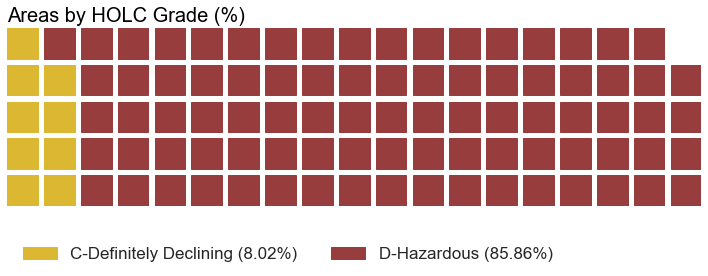

In [292]:
atlantic_df = df_holc[0:2]
atlantic_df['holc_perc'] = (atlantic_df['area_intersect'] / atlantic_df['area_test']) * 100

data = {'C-Definitely Declining': 8.02, 'D-Hazardous': 85.86}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#DCB732","#983D3D"),
    title={'label': 'Areas by HOLC Grade (%)', 'loc': 'left', 'color': 'black','fontsize':'20'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0,'fontsize':'17'},
    figsize=(10,20)
)

plt.show()

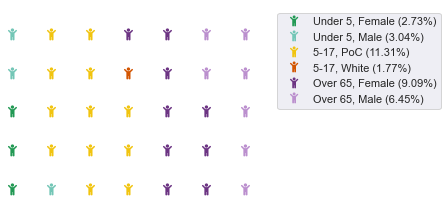

In [306]:
atlantic_census = df_rankCensus.loc[df_rankCensus['S_HOOD'] == "Atlantic"]

(atlantic_census.groupby('S_HOOD')[columns].sum() / 8759) * 100


## 8759

data = {'Under 5, Female': 2.73, 'Under 5, Male': 3.04, '5-17, PoC': 11.31, '5-17, White':1.77,'Over 65, Female':9.09,'Over 65, Male':6.45}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=["#229954", "#73C6B6", "#F1C40F","#D35400","#6C3483","#BB8FCE"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    icons='child', 
    font_size=12, 
    icon_legend=True
)
plt.show()

In [173]:
# To do: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart

In [43]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

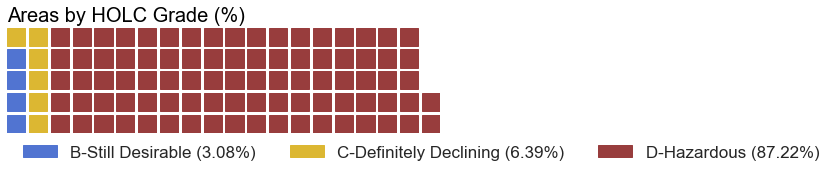

In [87]:
data = {'B-Still Desirable': 3.08, 'C-Definitely Declining': 6.39, 'D-Hazardous': 87.22} # DELRIDGE
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#5174D1", "#DCB732","#983D3D"),
    title={'label': 'Areas by HOLC Grade (%)', 'loc': 'left', 'color': 'black','fontsize':'20'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0,'fontsize':'17'},
    figsize=(10,20)
)
# fig.gca().set_facecolor('#EEEEEE')
# fig.set_facecolor('#EEEEEE')
plt.show()

fig.savefig('./assets/DELRIDGE.png', transparent=True)

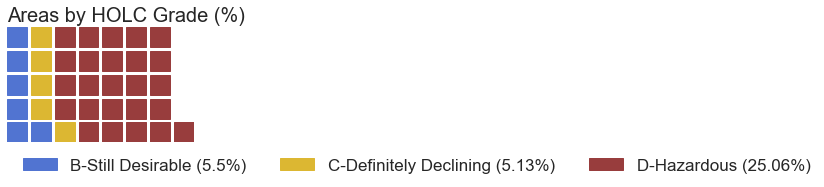

/home/hp-nunes/anaconda3/envs/TEST/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


In [96]:
data = {'B-Still Desirable': 5.5, 'C-Definitely Declining': 5.13, 'D-Hazardous': 25.06} # Downtown-Central-Indus
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#5174D1", "#DCB732","#983D3D"),
    title={'label': 'Areas by HOLC Grade (%)', 'loc': 'left','fontsize':'20'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0,'fontsize':'17'},
    figsize=(8,8)
)
# fig.gca().set_facecolor('#EEEEEE')
# fig.set_facecolor('#EEEEEE')
plt.show()
fig.savefig('./assets/Downtown-Central-Indus.png', transparent=True)

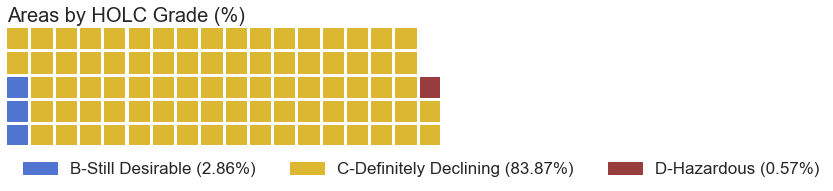

In [86]:
data = {'B-Still Desirable': 2.86, 'C-Definitely Declining': 83.87, 'D-Hazardous': 0.57} # Rainier Valley
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#5174D1", "#DCB732","#983D3D"),
    title={'label': 'Areas by HOLC Grade (%)', 'loc': 'left','fontsize':'20'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0,'fontsize':'17'},
    figsize=(10,20)
)
# fig.gca().set_facecolor('#EEEEEE')
# fig.set_facecolor('#EEEEEE')
plt.show()
fig.savefig('./assets/Rainier_Valley.png', transparent=True)

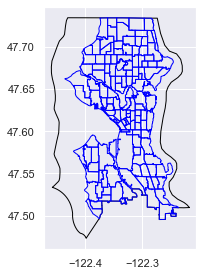

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# d['D_districts'].plot(ax=ax, facecolor='none', edgecolor='red');
# d['C_districts'].plot(ax=ax, facecolor='none', edgecolor='orange');
d['seattle'].plot(ax=ax, facecolor='none', edgecolor='black');

d['Racial_and_Social_Equity_Composite_Index'].plot(ax=ax, facecolor='none', edgecolor='blue');
# d['Council_Districts'].plot(ax=ax, facecolor='none', edgecolor='blue');
# d['Zoned_Development_Capacity_Layers_2016'].plot(ax=ax, facecolor='none', edgecolor='blue');
# d['Landfill_Areas'].plot(ax=ax, facecolor='none', edgecolor='blue');
# d['WASeattle1936'].plot(ax=ax, facecolor='none', edgecolor='blue');
# d['Mandatory_Housing_Affordability__MHA__Fee_Areas'].plot(ax=ax, facecolor='none', edgecolor='blue');
# d['Census_Block_-_2010_Population_Statistics'].plot(ax=ax, facecolor='none', edgecolor='blue');



plt.tight_layout();

# Scatterpoints (PurpleAir; Air District)

### PurpleAir

In [44]:
import glob
import pandas as pd

files = glob.glob('./data_airQA/purpleAir/*.csv')

for i, f in enumerate (files):
    if i == 0:
        df = pd.read_csv(f)
        df['fname'] = f
    else:
        tmp = pd.read_csv(f)
        tmp['fname'] = f
        df = df.append(tmp)
df.head()

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9,fname
0,2020-01-01 00:00:00 UTC,0.24,0.55,0.70,41424.0,-72.25,56.28,66.11,0.55,NaN,./data_airQA/purpleAir/Seattle (outside) (47.6...
1,2020-01-02 00:00:00 UTC,1.64,2.73,3.17,42864.0,-70.79,51.11,59.90,2.73,NaN,./data_airQA/purpleAir/Seattle (outside) (47.6...
2,2020-01-03 00:00:00 UTC,2.46,3.44,3.76,44304.0,-72.44,55.19,61.13,3.44,NaN,./data_airQA/purpleAir/Seattle (outside) (47.6...
3,2020-01-04 00:00:00 UTC,0.77,1.36,1.62,45744.0,-72.13,51.65,57.38,1.36,NaN,./data_airQA/purpleAir/Seattle (outside) (47.6...
4,2020-01-05 00:00:00 UTC,1.00,1.59,1.82,47184.0,-71.09,50.61,57.25,1.59,NaN,./data_airQA/purpleAir/Seattle (outside) (47.6...


### Air Districts

In [45]:
AWS_df = pd.read_csv('data_airQA/aws_Seattle_clean.csv',index_col=0)
AWS_df.head()

,date,parameter,location,value,unit,city,attribution,hour,dateTime,Latitude,Longitude
4,2016-05-29,pm25,Seattle-Beacon Hill,1.3,µg/m³,Seattle-Tacoma-Bellevue,"US EPA AirNow, http://www.airnow.gov/, Washing...",11:00,2016-05-29 11:00:00,47.568237,-122.308624
6,2016-05-29,pm25,Tacoma-S 36th St,4.0,µg/m³,Seattle-Tacoma-Bellevue,"US EPA AirNow, http://www.airnow.gov/, Washing...",11:00,2016-05-29 11:00:00,47.226340,-122.462560
8,2016-05-29,pm25,Lynnwood-212th,1.8,µg/m³,Seattle-Tacoma-Bellevue,"US EPA AirNow, http://www.airnow.gov/, Washing...",11:00,2016-05-29 11:00:00,47.806400,-122.316700
9,2016-05-29,pm25,Tacoma-L St,0.9,µg/m³,Seattle-Tacoma-Bellevue,"US EPA AirNow, http://www.airnow.gov/, Washing...",11:00,2016-05-29 11:00:00,47.186400,-122.451700
10,2016-05-29,pm25,Seattle-Duwamish,1.6,µg/m³,Seattle-Tacoma-Bellevue,"US EPA AirNow, http://www.airnow.gov/, Washing...",11:00,2016-05-29 11:00:00,47.562000,-122.340500


## Wrangling

In [46]:
# Getting the location from the filename
df['location'] = df.fname.str.split('./data_airQA/purpleAir/').str[1].str.split('(').str[0]

# Split Latitude and Longitude into separate fields
df['Longitude'] = df.fname.str.split(')').str[1].str.split('-').str[1]
df['Latitude'] = df.fname.str.split(')').str[1].str.split('-').str[0].str.replace(r'(', '')
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float) * -1

# Sensor location type
df['location_type'] = df.fname.str.split('(').str[1].str.replace(r')', '')

# Fix & format the time fields
df['date'] = df.created_at.str.split(' ').str[0]
df['hour'] = df.created_at.str.split(' ').str[1].str.replace(r'UTC', '')
df['dateTime'] = pd.to_datetime(df['date'] + ' ' + df['hour'])
df = df.sort_values(by='dateTime')
df.set_index(['dateTime'], inplace = True)

# Filter the date range (01/01/20 to 04/17/2020)
import datetime 
df = df.loc[datetime.date(year=2020,month=1,day=1):datetime.date(year=2020,month=5,day=31)]

# Convert UTC to PST
df.index = df.index.tz_localize('UTC').tz_convert('US/Pacific')


# Drop unwanted fields
df= df.drop(['Unnamed: 9','fname','created_at'],axis=1)

# Drop "undefined location types, i.e. only retain locations confirmed interior/outside"
df = df[df.location_type != 'undefined ']
df = df.reset_index()
print(df.dtypes)
print(len(df))

dateTime            datetime64[ns, US/Pacific]
PM1.0_CF1_ug/m3                        float64
PM2.5_CF1_ug/m3                        float64
PM10.0_CF1_ug/m3                       float64
UptimeMinutes                          float64
RSSI_dbm                               float64
Temperature_F                          float64
Humidity_%                             float64
PM2.5_ATM_ug/m3                        float64
location                                object
Longitude                              float64
Latitude                               float64
location_type                           object
date                                    object
hour                                    object
dtype: object
7002


## Intersect the datapoints with the Seattle's boundaries

In [47]:
import shapely.speedups

shapely.speedups.enable()

points_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

type(points_gdf)

pip_mask = points_gdf.within(d['seattle'].loc[0, 'geometry'])
pip_data = df.loc[pip_mask]

In [48]:
points_gdf = gpd.GeoDataFrame(
    AWS_df, geometry=gpd.points_from_xy(AWS_df.Longitude, AWS_df.Latitude))

type(points_gdf)

pip_mask = points_gdf.within(d['seattle'].loc[0, 'geometry'])
pip_data_AWS = AWS_df.loc[pip_mask]

## Mapping all features

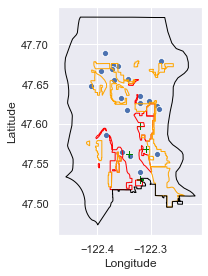

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = sns.scatterplot(x="Longitude", y="Latitude", data=pip_data)
ax = sns.scatterplot(x="Longitude", y="Latitude", data=pip_data_AWS,marker="+",color='green')

d['D_districts'].plot(ax=ax, facecolor='none', edgecolor='red');
d['C_districts'].plot(ax=ax, facecolor='none', edgecolor='orange');
d['seattle'].plot(ax=ax, facecolor='none', edgecolor='black');


plt.tight_layout();

## Preparing_Datasets_for_QGIS

### Get sensor's unique locations

In [74]:
## Just the unique location: AWS and PurpleAir

purpleAir_unique = pip_data.groupby('location')['Latitude','Longitude','PM10.0_CF1_ug/m3'].mean().reset_index()
AWS_unique = pip_data_AWS.groupby('location')['Latitude','Longitude','value'].mean().reset_index()

/home/hp-nunes/anaconda3/envs/TEST/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hp-nunes/anaconda3/envs/TEST/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [76]:
# purpleAir_unique.to_csv('outputs/forQGIS_purpleAirunique.csv') 
# AWS_unique.to_csv('outputs/forQGIS_AWSunique.csv') 

# ## Will be used to create coverage buffers

### Format the census dataset for certain vulnerable age groups

In [53]:
df = d['Census_Block_-_2010_Population_Statistics']

display(df.head(2))

df.columns

print(type(df))

,OBJECTID,GEOID10,TRACT_10,BLOCK_10,TRBL_10,TRBG_10,ACRES_TOTAL,ACRES_LAND,ACRES_WATER,GEO_TYPE,...,Female_White_65_and_over,Male_Person_of_Color,Female_Person_of_Color,Male_Person_of_Color_under_5_years,Female_Person_of_Color_under_5_years,Male_Person_of_Color_5_17_years,Female_Person_of_Color_5_17_years,Male_Person_of_Color_65_and_over,Female_Person_of_Color_65_and_over,geometry
0,1,530330067001001,6700,1001,6700.1001,6700.1,29.929738,29.931381,0.0,Block,...,2,5,3,0,0,0,0,0,0,"POLYGON ((-122.34063 47.63249, -122.34065 47.6..."
1,2,530330069001009,6900,1009,6900.1009,6900.1,5.043609,5.043915,0.0,Block,...,3,6,8,0,1,2,2,0,0,"POLYGON ((-122.36232 47.63593, -122.36230 47.6..."


<class 'geopandas.geodataframe.GeoDataFrame'>


In [54]:
age_df = df[['GEOID10','TRACT_10','BLOCK_10','ACRES_TOTAL','ACRES_LAND','Total_Population',
    'Female_under_5_years','Male_under_5_years',
    'Female_Person_of_Color_5_17_years','Male_Person_of_Color_5_17_years',
    'Female_White_5_17_years','Male_White_5_17_years',
    'Female_Age_65_and_over',
    'Male_Age_65_and_over']]

In [29]:
## I only want the total population for PoC/White, & Elderly pops. Children under 5 shows different rate of asthma 
## hospitalization.

age_df['PoC_5_17_years'] = age_df['Female_Person_of_Color_5_17_years'] + age_df['Male_Person_of_Color_5_17_years']
age_df['White_5_17_years'] = age_df['Female_White_5_17_years'] + age_df['Male_White_5_17_years']

age_df['All_over_65_years'] = age_df['Female_Age_65_and_over'] + age_df['Male_Age_65_and_over']


age_df = age_df.drop(['Female_Person_of_Color_5_17_years','Male_Person_of_Color_5_17_years','Female_White_5_17_years','Male_White_5_17_years','Female_Age_65_and_over','Male_Age_65_and_over'], axis = 1)

age_df.head()

/home/hp-nunes/anaconda3/envs/TEST/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/hp-nunes/anaconda3/envs/TEST/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/hp-nunes/anaconda3/envs/TEST/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,GEOID10,TRACT_10,BLOCK_10,ACRES_TOTAL,ACRES_LAND,Total_Population,Female_under_5_years,Male_under_5_years,PoC_5_17_years,White_5_17_years,All_over_65_years
0,530330067001001,6700,1001,29.929738,29.931381,38,0,0,0,0,7
1,530330069001009,6900,1009,5.043609,5.043915,90,4,5,4,13,3
2,530330116003013,11600,3013,5.853180,5.853185,67,1,0,4,6,13
3,530330116005021,11600,5021,3.973887,3.973949,56,2,3,5,5,7
4,530330116005023,11600,5023,0.666380,0.666443,0,0,0,0,0,0


In [41]:
print(type(age_df))

# age_df.to_csv('outputs/forQGIS_age.csv') 

## Export to QGIS and Join the csv to the Census Block Shapefile by the 'GEOID10' field ID.

<class 'pandas.core.frame.DataFrame'>


### Grouping Age Groups from blocks to tracts

In [55]:
group_age = d['censusBlocks_validated_intersectedwithTracts']

column = ['Female_under_5_years', 'Male_under_5_years',
       'Female_Person_of_Color_5_17_years', 'Male_Person_of_Color_5_17_years',
       'Female_White_5_17_years', 'Male_White_5_17_years',
       'Female_Age_65_and_over', 'Male_Age_65_and_over']

group_age[column] = group_age[column].astype(str).astype(int)

In [56]:
group_age = group_age.groupby('NAMELSAD10').sum().reset_index()
group_age = group_age.drop(['OBJECTID', 'TRBL_10', 'TRBG_10', 'ACRES_WATER','OBJECTID_2',
                 'ACRES_LAND_2', 'ACRES_WATE', 'SHAPE_Length','SHAPE_Area'], axis =1)

In [58]:
# group_age.to_csv('outputs/group_age.csv') 